In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import numpy as np
import seaborn as sns
from matplotlib.ticker import FuncFormatter
from nltk.corpus import cess_esp
from collections import Counter
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from IPython.display import display, Image

Uncomment the following lines of code to install `omw`, `cess_esp`, `punkt`, `wordnet`:

In [2]:
#nltk.download('omw')  # Descargar el recurso WordNet en español
#nltk.download('cess_esp')  # Descargar el corpus CESS en español (etiquetado POS)
#nltk.download('punkt')
#nltk.download('wordnet')

In [3]:
import sys
sys.path.insert(0, '/Users/eduardomorenoortiz/Desktop/ITAM/nanook/nlp_nanook/src') # LOCAL
from utils.utils import get_corpus_N_gram

### Manual configuration

In case `nltk.download('omw')`, `nltk.download('cess_esp')` and/or `nltk.download('punkt')` response were **False**, then download following models from the next [link](http://www.nltk.org/nltk_data/):
- Model: *Extended Open Multilingual WordNet*, ID: *extended_omw*
- Model: *CESS-ESP Treebank*, ID: *cess_esp*
- Model: *Punkt Tokenizer Models*, ID: *punkt*
- Model: *WordNet*, ID: *wordnet*

Once files are downloaded move them to:
- *extended_omw*, *cess_esp*: */env_nanook/lib/nltk_data/tokenizers* 
- *punkt*: */env_nanook/lib/nltk_data/tokenizers*
- *wordnet*: */env_nanook/lib/nltk_data/tokenizers/corpora*

Update the following line of code with the specific path for folder `nltk_data`

In [4]:
nltk.data.path.append('/Users/eduardomorenoortiz/Desktop/ITAM/nanook/nlp_nanook/env_nlp_nanook/lib/python3.11/site-packages/nltk/nltk_data') # Uncomment if necessary

# Load data

In [5]:
df_clean = pd.read_pickle('../../data/preprocessed/clean_text_nanook.pkl')

In [6]:
df_clean.head()

,Page Name,Facebook Id,Likes at Posting,Post Created,Type,Total Interactions,Likes,Comments,Shares,Love,...,Angry,Care,Message,Image Text,Link Text,Description,Overperforming Score (weighted — Likes 1x Shares 1x Comments 1x Love 1x Wow 1x Haha 1x Sad 1x Angry 1x Care 1x ),messageChar_length,messageWords_length,Message_clean
0,AgroForestales C.A.,100069920850250,NaN,2017-12-31 23:43:00 CST,Link,18,16,0,2,0,...,0,0,Mitigar el cambio climático con los pies en la...,NaN,Mitigar el cambio climático con los pies en la...,La importancia de la conservación de los suelo...,-2.11,253,11,mitigar el cambio climatico con los pies en la...
1,El Sol de San Juan del Río,100064929514903,82377.0,2017-12-31 23:00:11 CST,Link,3,3,0,0,0,...,0,0,#México 🇲🇽 | La Ciudad de México es la primera...,NaN,Buscan a líderes contra el cambio climático,La Ciudad de México es la primera urbe en Lati...,-40,124,22,mexico la ciudad de mexico es la primera urb...
2,Víctor Quintana Silveyra,100063648342761,NaN,2017-12-31 21:57:39 CST,Status,115,68,33,3,11,...,0,0,Para este 2018 que comienza les deseo de coraz...,NaN,NaN,NaN,1.58,608,101,para este 2018 que comienza les deseo de coraz...
3,Webguerrillera Internacional,100067009789858,NaN,2017-12-31 20:41:50 CST,Link,5,2,0,1,0,...,1,0,La ONU lanza alerta roja para 2018 por armas n...,NaN,La ONU lanza alerta roja para 2018 por armas n...,CIUDAD DE MÉXICO (proceso.com.mx).- El secreta...,-0.72,173,29,la onu lanza alerta roja para 2018 por armas n...
4,Libertad y Pensamiento,530019227057516,142143.0,2017-12-31 20:30:00 CST,Link,31,21,0,3,1,...,1,0,Novedoso proyecto busca instalar paneles solar...,NaN,"Instalar paneles solares en la luna, una salid...",Novedoso proyecto busca instalar paneles solar...,-5.39,228,17,novedoso proyecto busca instalar paneles solar...


In [7]:
df_clean.shape

(87422, 23)

# Stemming

**Stemming** is a text normalization process used in *Natural Language Processing* (*NLP*) to reduce words to their base or root form, known as the **stem**. The goal of stemming is to obtain a common representation for variations of words that share the same root, even if that root may not be an actual word. The resulting stems may not always be semantically valid words but serve the purpose of grouping similar words together.

Stemming involves removing prefixes or suffixes from words to derive their root forms. The idea is to simplify words to their basic linguistic or morphological components. This process is particularly useful in tasks such as text analysis, information retrieval, and search engine optimization.

Key points about stemming:

1. Reduction of Inflected Words: Stemming reduces words to their base or root forms, removing variations caused by different tenses, pluralization, or other grammatical forms. For example, the stem of "running" is "run," and the stem of "happily" is "happi."

1. Heuristic-Based Approach: Stemming algorithms typically use heuristic rules to apply transformations to words. These rules are designed to strip common prefixes or suffixes, but they may not always result in a linguistically valid word.

1. Simplification of Vocabulary: Stemming helps simplify the vocabulary by treating different inflections of a word as the same entity. This can reduce the dimensionality of the data and improve the efficiency of text analysis.

1. Fast and Lightweight: Stemming is computationally less intensive than lemmatization, making it faster and more suitable for tasks where speed is crucial.

Here's a simple example in English:

- Word: "Running"
- Stem: "Run"

It's important to note that stemming does not consider the context or semantics of words. Different stemming algorithms may produce different results, and there might be cases where stemming produces stems that are not valid words or may not accurately reflect the intended meaning. Popular stemming algorithms include the Porter Stemmer and the Lancaster Stemmer.

Reference:
- Prompt: What is stemming? - [ChatGPT](https://chat.openai.com/)

In [8]:
stemmer = SnowballStemmer("spanish")

In [9]:
def realizar_stemming(texto):
    palabras = nltk.word_tokenize(texto, language='spanish')
    stems = [stemmer.stem(palabra) for palabra in palabras]
    return ' '.join(stems)

In [10]:
print(f"Original text: {df_clean['Message_clean'][0]}")
print(f"Stemmed text: {realizar_stemming(texto=df_clean['Message_clean'][0])}")
print('-'*30)
print(f"Original text: {df_clean['Message_clean'][23]}")
print(f"Stemmed  text: {realizar_stemming(texto=df_clean['Message_clean'][23])}")

Original text: mitigar el cambio climatico con los pies en la tierra 
Stemmed text: mitig el cambi climat con los pies en la tierr
------------------------------
Original text: el representante de la onu menciono los graves conflictos y violaciones de derechos humanos los peligros que representan las armas nucleares y el cambio climatico para la seguridad del planeta
Stemmed  text: el represent de la onu mencion los grav conflict y violacion de derech human los peligr que represent las armas nuclear y el cambi climat par la segur del planet


Be patient with the following task... my computer finished in $4$ mins.

In [11]:
stemming = df_clean['Message_clean'].apply(lambda x: realizar_stemming(texto=x)) # Uncomment if first time running the notebook
df_clean['Message_clean_stemm'] = stemming # Uncomment if first time running the notebook

# Lemmatization

**Lemmatization** is a linguistic process commonly used in *Natural Language Processing* (*NLP*) to reduce words to their base or root form, known as the **lemma**. The lemma represents the canonical, dictionary form of a word. Lemmatization is different from stemming, which involves removing prefixes or suffixes from a word to obtain its root form, even if that root form may not be an actual word.

The main goal of lemmatization is to group different inflected forms of a word so they can be analyzed as a single item. This process is crucial for tasks like text analysis, information retrieval, and language modeling. Lemmatization helps in reducing the dimensionality of the vocabulary and improving the accuracy of text analysis by focusing on the core meaning of words.

Here are some key points about lemmatization:

1. Word Normalization: Lemmatization performs a kind of word normalization by transforming words into their base or root form. For example, the lemma of the word "running" is "run," and the lemma of "better" is "good."

1. Context Preservation: Unlike stemming, lemmatization considers the context and meaning of a word before determining its base form. This helps in producing more accurate and meaningful results.

1. Dictionary-Based Approach: Lemmatization often relies on dictionaries or morphological analysis to map words to their lemmas. These dictionaries include information about the base forms of words and their grammatical properties.

1. Part-of-Speech Consideration: Lemmatization may take into account the part of speech (POS) of a word to determine its correct lemma. For example, the lemma of "better" as an adjective is "good," but as an adverb, it remains "better."

1. Improved Text Analysis: Lemmatization can improve the accuracy of text analysis tasks such as sentiment analysis, topic modeling, and information retrieval by reducing words to their essential forms.

Here's a simple example in English:

- Word: "Running"
- Lemma: "Run"

In the context of NLP, libraries like NLTK (Natural Language Toolkit) and spaCy provide lemmatization tools and resources for multiple languages. Lemmatization is a valuable preprocessing step in many NLP applications to enhance the understanding and analysis of textual data.


Reference:
- Prompt: What is lemmatization? - [ChatGPT](https://chat.openai.com/)

In [12]:
lematizador = WordNetLemmatizer()

The following code will lemmatize text incorrectly

In [13]:
def lematizar_texto(texto):
    palabras = nltk.word_tokenize(texto, language='spanish')
    lemas = [lematizador.lemmatize(palabra) for palabra in palabras]
    return ' '.join(lemas)

In [14]:
print(f"Original text: {df_clean['Message_clean'][0]}")
print(f"Lemmatized  text: {lematizar_texto(texto=df_clean['Message_clean'][0])}")
print('-'*30)
print(f"Original text: {df_clean['Message_clean'][23]}")
print(f"Lemmatized  text: {lematizar_texto(texto=df_clean['Message_clean'][23])}")
print('-'*30)
print(f"Original text: nota como la palabra graves tiene asociado el token graf")
print(f'Lemmatized  text: {lematizar_texto(texto="nota como la palabra graves tiene asociado el token graf")}')

Original text: mitigar el cambio climatico con los pies en la tierra 
Lemmatized  text: mitigar el cambio climatico con los pie en la tierra
------------------------------
Original text: el representante de la onu menciono los graves conflictos y violaciones de derechos humanos los peligros que representan las armas nucleares y el cambio climatico para la seguridad del planeta
Lemmatized  text: el representante de la onu menciono los graf conflictos y violaciones de derechos humanos los peligros que representan la armas nucleares y el cambio climatico para la seguridad del planeta
------------------------------
Original text: nota como la palabra graves tiene asociado el token graf
Lemmatized  text: nota como la palabra graf tiene asociado el token graf


> By loading:
>
> `lematizador = WordNetLemmatizer()`
>
> `lematizador` will be a *lemmatizer* for English! It can handle some words for spanish but is not a built for lemmatizing text in Spanish. 
>
> It could be more helpful to use `spaCy` (which will be introduced to you later...) 

If you run:

```
lematizador = WordNetLemmatizer()
```

It is expected the next ERROR:

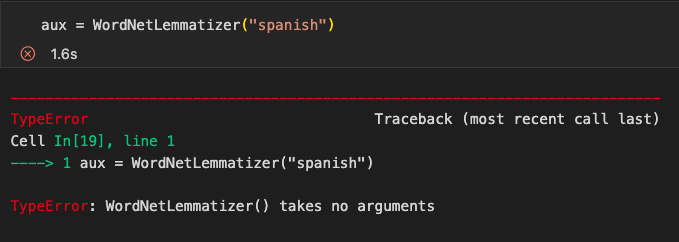

In [15]:
display(Image(filename='../images/expected_error.png'))

Do not worry, the error shown above **IS NOT AN ERROR, IS AN IMAGE!**

> The function `lematizar_texto()` define as:
>
> ```
>   def lematizar_texto(texto):
>
>       palabras = nltk.word_tokenize(texto, language='spanish')
>
>       lemas = [lematizador.lemmatize(palabra) for palabra in palabras]
>
>       return ' '.join(lemas)
> ```
>
> Works as follows, the code:
> 
> ```
> palabras = nltk.word_tokenize(texto, language='spanish')
> ```
> 
> Is mapping each word in `texto` to it respective token defined in `/Users/eduardomorenoortiz/Desktop/ITAM/nanook/nlp_nanook/env_nlp_nanook/lib/> python3.11/site-packages/nltk/nltk_data/tokenizers/punkt/spanish.pickle`. 
> 
> In the final part:
> 
> ```
> lemas = [lematizador.lemmatize(palabra) for palabra in palabras]
> ```
> 
> Is lemmatizing words on Spanish using a model built to lemmatized text in English!
> 
> Now, do you see why the text was erroneous?
>
> [Here](https://stackoverflow.com/questions/60534999/how-to-solve-spanish-lemmatization-problems-with-spacy) an interesting chat about this issue.

The corrected function using `spaCy` is:

In [16]:
import spacy

In [17]:
spacy.__version__

'3.7.4'

In [18]:
nlp = spacy.load('es_core_news_lg')

In [19]:
def lematizar_texto(texto):
    lemas = nlp(texto)
    lematizado = [token.lemma_ for token in lemas]
    return ' '.join(lematizado)

In [20]:
print(f"Original text: {df_clean['Message_clean'][0]}")
print(f"Lemmatized  text: {lematizar_texto(texto=df_clean['Message_clean'][0])}")
print('-'*30)
print(f"Original text: {df_clean['Message_clean'][23]}")
print(f"Lemmatized  text: {lematizar_texto(texto=df_clean['Message_clean'][23])}")
print('-'*30)
print(f"Original text: nota como la palabra graves ahora tiene asociado el token graves")
print(f'Lemmatized  text: {lematizar_texto(texto="nota como la palabra graves ahora tiene asociado el token graves")}')

Original text: mitigar el cambio climatico con los pies en la tierra 
Lemmatized  text: mitigar el cambio climatico con el pie en el tierra
------------------------------
Original text: el representante de la onu menciono los graves conflictos y violaciones de derechos humanos los peligros que representan las armas nucleares y el cambio climatico para la seguridad del planeta
Lemmatized  text: el representante de el onu mencionar el grave conflicto y violación de derechos humanos el peligro que representar el arma nuclear y el cambio climatico para el seguridad del planeta
------------------------------
Original text: nota como la palabra graves ahora tiene asociado el token graves
Lemmatized  text: nota como el palabra grave ahora tener asociado el token grave


Be more patient, the following code will take more time to run (my machine finished in 30 mins!)

In [21]:
lemmatization = df_clean['Message_clean'].apply(lambda x: lematizar_texto(texto=x)) # Uncomment if first time running the notebook
df_clean['Message_clean_lemm'] = lemmatization # Uncomment if first time running the notebook

Here is the evidence, the code bellow **IS AN IMAGE**:

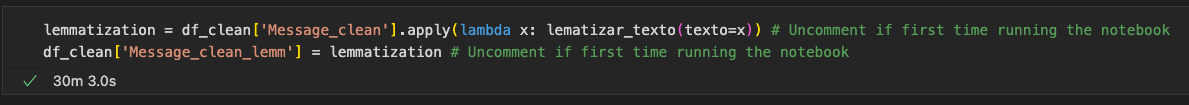

In [45]:
display(Image(filename='../images/time_lemm_text.png'))

# Stop words

In [22]:
with open('../utils/spanish_stopwords.txt', 'r') as archivo:
    stop_words = [linea.strip() for linea in archivo]
len(stop_words)

608

**Here's finish the first session!**

In [23]:
# Función para formatear las etiquetas del eje Y en formato abreviado (por ejemplo, 120k)
def formato_abreviado(valor, posicion):
    if valor >= 1000:
        return f'{int(valor/1000)}k'
    else:
        return int(valor)

In [24]:
df_clean.to_pickle('../../data/preprocessed/stemm_lemm_text_nanook.pkl') # Uncomment if first time running the notebook

Length of corpus: 3802760


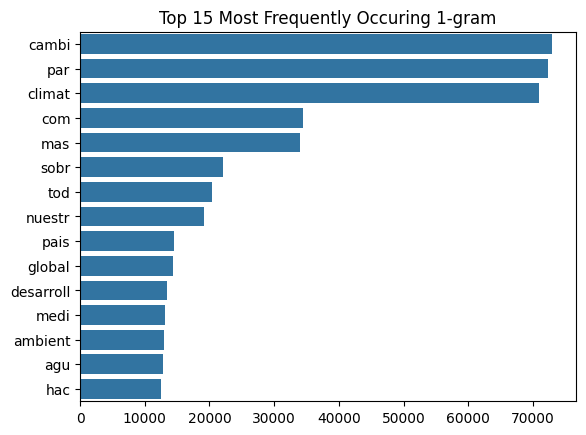

In [25]:
corpus_stemm = get_corpus_N_gram(list_text=df_clean['Message_clean_stemm'], stop_words=stop_words, ngram=1, show_plot=True)

Length of corpus: 3425310


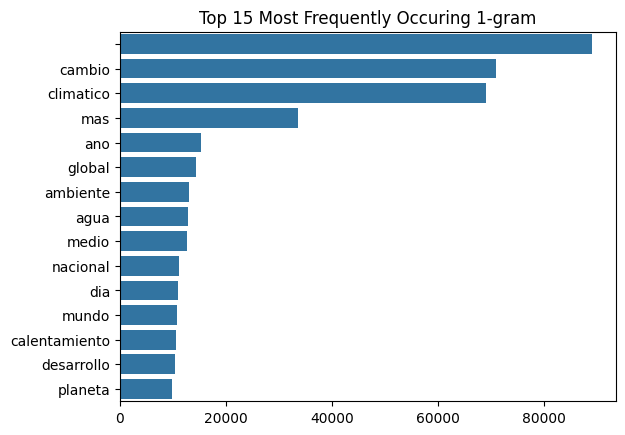

In [26]:
corpus_lemm = get_corpus_N_gram(list_text=df_clean['Message_clean_lemm'], stop_words=stop_words, ngram=1, show_plot=True)

In [27]:
count_corpus_stem = Counter(corpus_stemm)
count_corpus_lemm = Counter(corpus_lemm)

In [28]:
count_corpus_stem = count_corpus_stem.most_common()
count_corpus_lemm = count_corpus_lemm.most_common()

In [29]:
print(len(count_corpus_stem))
print(len(count_corpus_lemm))

89211
114854


In [30]:
for i in count_corpus_stem:
    print(i)
    print(i[0], i[1])
    break

('cambi', 73010)
cambi 73010


In [31]:
thresholds = []
n_words_stem = []
n_words_lem = []

#for threshold in range(2, 100):
#    thresholds.append(threshold)
#    n_words_stem.append(len([palabra[0] for palabra in count_corpus_stem if palabra[1] < threshold]))
#    n_words_lem.append(len([palabra[0] for palabra in count_corpus_lemm if palabra[1] < threshold]))

for threshold in range(2, 100):
    thresholds.append(threshold)
    n_words_stem.append(len([palabra[0] for palabra in count_corpus_stem if palabra[1] < threshold]))
    n_words_lem.append(len([palabra[0] for palabra in count_corpus_lemm if palabra[1] < threshold]))

In [32]:
df_threshold = pd.DataFrame({'threshold': thresholds, 'stemming':n_words_stem, 'lemmatization':n_words_lem})

In [33]:
df_threshold.head()

,threshold,stemming,lemmatization
0,2,44632,57619
1,3,57018,73852
2,4,62907,81646
3,5,66613,86499
4,6,69129,89810


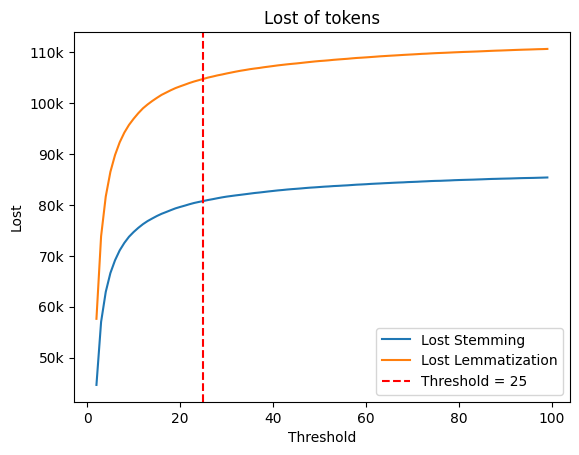

In [34]:
# Graficar las dos líneas usando seaborn
sns.lineplot(data=df_threshold, x='threshold', y='stemming', label='Lost Stemming')
sns.lineplot(data=df_threshold, x='threshold', y='lemmatization', label='Lost Lemmatization')
# Ajuste de labels en los ejes
plt.gca().yaxis.set_major_formatter(FuncFormatter(formato_abreviado))
# Threshold = 25
plt.axvline(x=25, color='red', linestyle='dashed', label='Threshold = 25')
# Ajustes adicionales, como etiquetas y leyenda
plt.xlabel('Threshold')
plt.ylabel('Lost')
plt.title('Lost of tokens')
plt.legend()
# Mostrar el gráfico
plt.show()

Notice that may exists some **logarithmic** pattern on both lines!!!

In [35]:
threshold = 500

In [36]:
lost_words_stem = [palabra[0] for palabra in count_corpus_stem if palabra[1] < threshold]
lost_words_lemm = [palabra[0] for palabra in count_corpus_lemm if palabra[1] < threshold]

In [37]:
print("Lost tokens")
print(f"Stemming: {len(lost_words_stem)}")
print(f"Lemmatization: {len(lost_words_lemm)}")

Lost tokens
Stemming: 87890
Lemmatization: 113612


In [38]:
words_stem = [palabra[0] for palabra in count_corpus_stem if palabra[1] >= threshold]
words_lemm = [palabra[0] for palabra in count_corpus_lemm if palabra[1] >= threshold]

In [39]:
count_corpus_stem[0]

('cambi', 73010)

In [40]:
count_corpus_lemm[0]

('', 89035)

In [41]:
with open('../../data/corpus/corpus_counter_stemming.txt', 'w') as f:
    for item_i in count_corpus_stem:
        f.write(f"{item_i[0]}: {item_i[1]}\n")

In [42]:
with open('../../data/corpus/corpus_counter_lemmatization.txt', 'w') as f:
    for item_i in count_corpus_lemm:
        f.write(f"{item_i[0]}: {item_i[1]}\n")

We will select words that appear at least `threshold` times.

In [43]:
print(f"threshold: {threshold}")

threshold: 500


In [44]:
print(f"Number of words by Stemming: {len(words_stem)}")
print(f"Number of words by Lemmatization: {len(words_lemm)}")

Number of words by Stemming: 1321
Number of words by Lemmatization: 1242
